In [1]:
from ORBIT.phases.design import ElectricalDesign
from ORBIT import ParametricManager, ProjectManager
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_config = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
#         'distance_to_landfall': 50
    },
    'plant': {
         'num_turbines': 60, 
#          'capacity': 600
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
#     'export_system_design': {
#         'cables': 'XLPE_500mm_220kV',
    
}

In [3]:
parameters = {
    'export_system_design.cables': ['XLPE_500mm_220kV', 'XLPE_630mm_220kV', 'XLPE_800mm_220kV', 'XLPE_1000m_220kV'],
    'site.distance_to_landfall': np.arange(50,550,50),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(100,2300,300)
}

In [4]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
    'compensation': lambda run: run.cable.compensation_factor
}

In [5]:
parametric = ParametricManager(base_config, parameters, results, module=ElectricalDesign, product=True)
parametric.run()
parametric.results
# parametric.preview()

ORBIT library intialized at 'C:\Users\sbredenk\ORBIT\library'


,export_system_design.cables,site.distance_to_landfall,plant.capacity,cable_cost,oss_cost,compensation
0,XLPE_500mm_220kV,50,100,3.525830e+07,3.560015e+07,2.345849
1,XLPE_500mm_220kV,50,400,7.051660e+07,6.951580e+07,2.345849
2,XLPE_500mm_220kV,50,700,1.057749e+08,1.034314e+08,2.345849
3,XLPE_500mm_220kV,50,1000,1.762915e+08,8.312412e+07,2.345849
4,XLPE_500mm_220kV,50,1300,2.115498e+08,1.000819e+08,2.345849
...,...,...,...,...,...,...
315,XLPE_1000m_220kV,500,1000,1.710268e+09,3.890738e+08,3.174298
316,XLPE_1000m_220kV,500,1300,2.137835e+09,4.839672e+08,3.174298
317,XLPE_1000m_220kV,500,1600,2.565402e+09,5.794189e+08,3.174298
318,XLPE_1000m_220kV,500,1900,2.992969e+09,4.540108e+08,3.174298


In [6]:
# plt.plot(parametric.results.cable_cost)
# plt.show()
# index = results.index

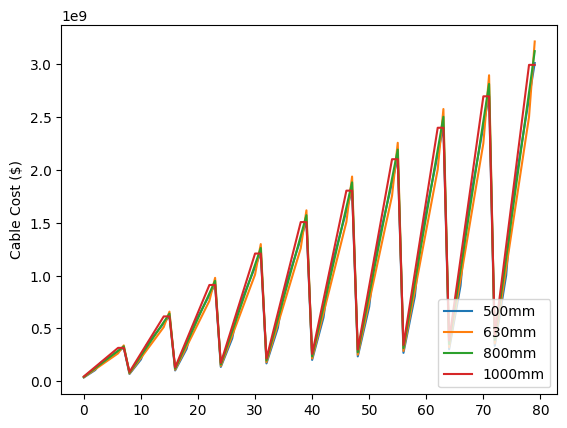

In [7]:
# number per line = total / 4
# 0 - (num-1), num - (2num-1), etc 
# 
num = int(len(parametric.results) / 4)
# print(num_per_cable)

# num = num_per_cable / 10
# print(num)

plt.plot(np.arange(num), parametric.results.cable_cost[0:num])
plt.plot(np.arange(num), parametric.results.cable_cost[num:2*num])
plt.plot(np.arange(num), parametric.results.cable_cost[2*num:3*num])
plt.plot(np.arange(num), parametric.results.cable_cost[3*num:4*num])
plt.legend(["500mm","630mm","800mm","1000mm"], loc = "lower right")
plt.ylabel("Cable Cost ($)")
plt.show()



In [8]:
num_per_cable = int(len(parametric.results) / 4)
print(num_per_cable)

plt.plot(np.arange(num), parametric.results.cable_cost[0:num])
plt.plot(np.arange(num), parametric.results.cable_cost[num:2*num])
plt.plot(np.arange(num), parametric.results.cable_cost[2*num:3*num])
plt.plot(np.arange(num), parametric.results.cable_cost[3*num:4*num])
plt.legend(["500mm","630mm","800mm","1000mm"], loc = "lower right")
plt.ylabel("Cable Cost ($)")
# plt.show()

80


Text(0, 0.5, 'Cable Cost ($)')